Checkpoint Objective

K-means & Hierarchical Clustering.

This case requires developing a customer segmentation to define marketing strategy. The sample Dataset summarizes the usage behavior of about 9000 active credit cardholders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the data dictionary for credit card dataset :

CUST_ID: Identification of credit cardholder (Categorical)

BALANCE: Balance amount left in their account to make purchases (BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated))

PURCHASES: Amount of purchases made from the account

ONEOFF_PURCHASES: Maximum purchase amount done in once

 INSTALLMENTS_PURCHASES: Amount of purchase done in installments

 CASH_ADVANCE: Cash in advance given by the user

PURCHASES_FREQUENCY: How frequently the purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

 ONEOFFPURCHASESFREQUENCY: How frequently purchases are happening at once (1 = frequently purchased, 0 = not frequently purchased)

 PURCHASESINSTALLMENTSFREQUENCY: How frequently purchases in installments are being made (1 = frequently done, 0 = not frequently done)

CASHADVANCEFREQUENCY: How frequently the cash in advance is being paid

CASHADVANCETRX: Number of transactions made with "Cash in Advance" PURCHASES_TRX: Number of purchase transactions made

 CREDIT_LIMIT: Limit of credit card for user

PAYMENTS: Amount of payment done by userMINIMUM_PAYMENTS: Minimum amount of payments made by user PRCFULLPAYMENT: Percent of full payment paid by userTENURE: Tenure of credit card service for user

1. Load your dataset.

2. Use hierarchical clustering to identify the inherent groupings within your data.

3. Plot the clusters.

4. Plot the dendrogram. Use K-means clustering.

5. Try different K values and select the best one.

6. Plot the clusters.

7. Compare the two results.

Bonus: Search for another validation metric

In [51]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

#Step 1: Load your dataset

In [52]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CC GENERAL.csv')

# Display the first few rows of the dataset
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


#Step 2: Use hierarchical clustering

In [53]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt


# Select relevant features for clustering (modify as needed)
selected_features = ['BALANCE', 'PURCHASES']
data_for_clustering = data[selected_features]

# Assume you want to create 4 clusters
# hierarchical_model = AgglomerativeClustering(n_clusters=4, linkage='ward', affinity='euclidean')  # Update this line
hierarchical_model = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
hierarchical_clusters = hierarchical_model.fit_predict(data_for_clustering)


#Step 3: Plot the hierarchical clusters

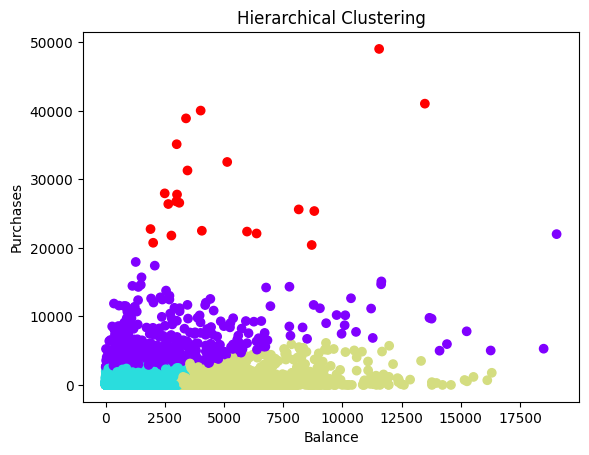

In [54]:
plt.scatter(data['BALANCE'], data['PURCHASES'], c=hierarchical_clusters, cmap='rainbow')
plt.title('Hierarchical Clustering')
plt.xlabel('Balance')
plt.ylabel('Purchases')
plt.show()


#Step 4: Plot the dendrogram

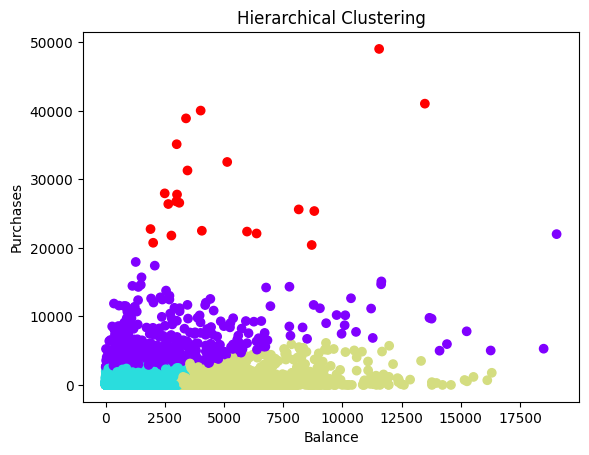

In [55]:
plt.scatter(data['BALANCE'], data['PURCHASES'], c=hierarchical_clusters, cmap='rainbow')
plt.title('Hierarchical Clustering')
plt.xlabel('Balance')
plt.ylabel('Purchases')
plt.show()


#Step 5: Use K-means clustering

In [56]:
from sklearn.cluster import KMeans

# Select relevant features for clustering (modify as needed)
selected_features = ['BALANCE', 'PURCHASES']
data_for_clustering = data[selected_features]

# Try different K values and select the best one using the elbow method
inertia = []
for k in range(2, 11):
    kmeans_model = KMeans(n_clusters=k, random_state=42, n_init=10)  # Explicitly set n_init
    kmeans_model.fit(data_for_clustering)
    inertia.append(kmeans_model.inertia_)

#Step 6: Plot the elbow method

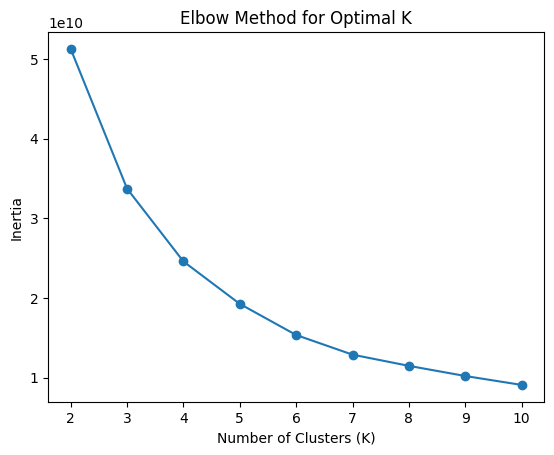

In [57]:
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()


#Step 7: Use the optimal K for K-means clustering

In [58]:
# Choose the optimal K based on the elbow method (e.g., K=4)
optimal_k = 4
kmeans_model_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)  # Explicitly set n_init
kmeans_clusters_optimal = kmeans_model_optimal.fit_predict(data_for_clustering)

#Step 8: Plot the K-means clusters

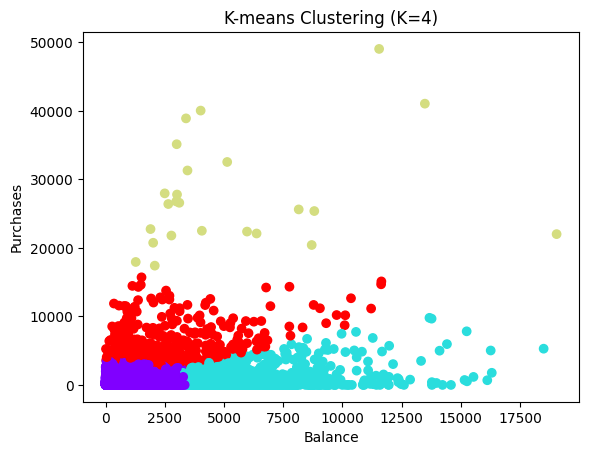

In [59]:
plt.scatter(data_for_clustering['BALANCE'], data_for_clustering['PURCHASES'], c=kmeans_clusters_optimal, cmap='rainbow')
plt.title('K-means Clustering (K=4)')
plt.xlabel('Balance')
plt.ylabel('Purchases')
plt.show()